Importações e declarações de variaváveis utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas: ", data.shape)
print(data.head(30))

datairis = pd.read_csv('data/iris.csv', header=(0))
dataadvertising = pd.read_csv('data/Advertising.csv', header=(0))

Número de linhas e colunas:  (25, 5)
   sepal_length sepal_width  petal_length petal_width    species
0           5.1         3.5           1.4         0.2  duplicada
1           5.1         3.5           1.4         0.2  duplicada
2             ?           3           1.4         0.2     setosa
3           4.7         3.2           1.3         0.2     setosa
4           5.1         3.5           1.4         0.2  duplicada
5           NaN         3.1           1.5         0.2     setosa
6             5         3.6           1.4         0.2     setosa
7           5.4         3.9           1.7         0.4  duplicada
8           5.4         3.9           1.7         0.4  duplicada
9           4.6         3.4           1.4         NaN     setosa
10            5         3.4           1.5         0.2     setosa
11          4.4         2.9           1.4         0.2  duplicada
12          4.9         3.1           1.5         0.1     setosa
13          5.4         3.7           1.5         0.2

Questão 1

In [36]:
data1 = data.copy()
data1 = data1.replace('?', np.nan)
data1 = data1.drop_duplicates()
data1 = data1.dropna()
data1 = data1.drop(data1.columns[-2:], axis=1)

print("Número de linhas e colunas: ", data1.shape)
print(data1.head(30))

Número de linhas e colunas:  (14, 3)
   sepal_length sepal_width  petal_length
0           5.1         3.5           1.4
3           4.7         3.2           1.3
6             5         3.6           1.4
7           5.4         3.9           1.7
10            5         3.4           1.5
11          4.4         2.9           1.4
12          4.9         3.1           1.5
13          5.4         3.7           1.5
15          4.8         3.4           1.6
16          4.8           3           1.4
18          4.3           3           1.1
19          5.8           4           1.2
20          5.7         4.4           1.5
22          5.1         3.5           1.4


Número de linhas: 14; número de colunas: 3

Questão 2

In [37]:
import numpy as np
import pandas as pd

data2 = data.copy()
data2 = data2.replace('?', np.nan)
colunas = data2.columns[0:data2.shape[1]-1]
X = np.array(data2[colunas], dtype=float)
medias = np.nanmean(X, axis=0)
medianas = np.nanmedian(X, axis=0)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):  
        if np.isnan(X[i, j]):
            X[i, j] = medias[j]

data2 = pd.DataFrame(X, columns=colunas)
data2[data.columns[-1]] = data[data.columns[-1]].values

print("Médias: ", medias)
print("Medianas: ", medianas)
print(data2.head(30))

Médias:  [5.02272727 3.4375     1.44       0.22608696]
Medianas:  [5.05 3.45 1.4  0.2 ]
    sepal_length  sepal_width  petal_length  petal_width    species
0       5.100000       3.5000           1.4     0.200000  duplicada
1       5.100000       3.5000           1.4     0.200000  duplicada
2       5.022727       3.0000           1.4     0.200000     setosa
3       4.700000       3.2000           1.3     0.200000     setosa
4       5.100000       3.5000           1.4     0.200000  duplicada
5       5.022727       3.1000           1.5     0.200000     setosa
6       5.000000       3.6000           1.4     0.200000     setosa
7       5.400000       3.9000           1.7     0.400000  duplicada
8       5.400000       3.9000           1.7     0.400000  duplicada
9       4.600000       3.4000           1.4     0.226087     setosa
10      5.000000       3.4000           1.5     0.200000     setosa
11      4.400000       2.9000           1.4     0.200000  duplicada
12      4.900000       3.100

As Medianas são [5.05 3.45 1.4  0.2 ]

Questão 3


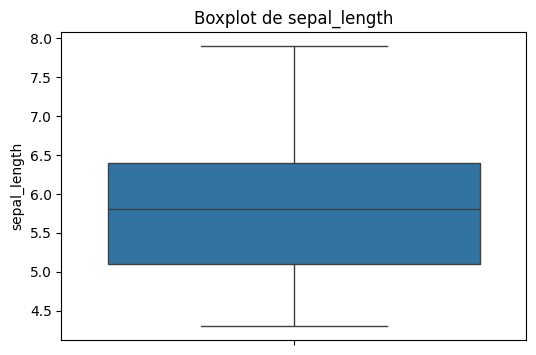

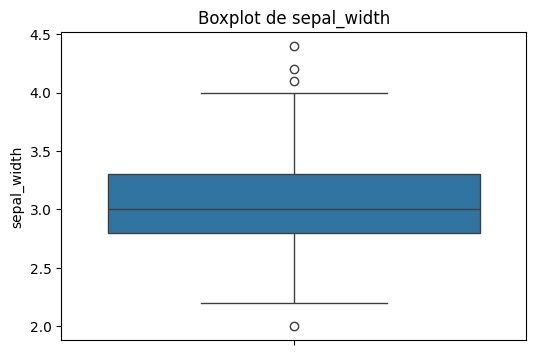

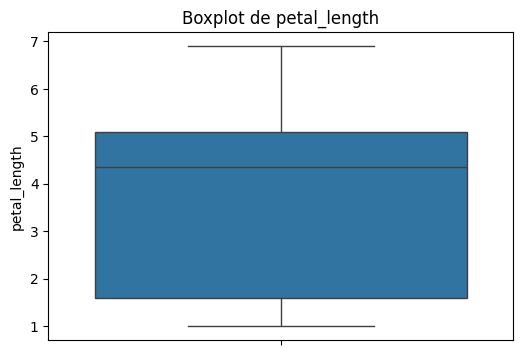

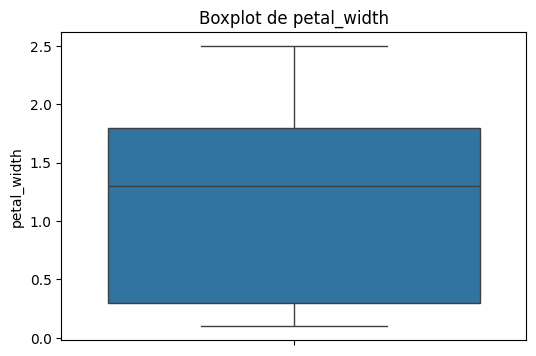

In [40]:

data_numerica = datairis.select_dtypes(include='number')

for coluna in data_numerica.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=datairis[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel(coluna)
    plt.show()

A única coluna que possuí outliers é sepal_width

Questão 4

In [41]:
matriz_correlacao = dataadvertising.corr()
print(matriz_correlacao)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


Há maior correlação em sales e TV (0,782224)